In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breakthrough-tech-ai-studio-challenge/sample_submission.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_keywords.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_metadata.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/train.csv
/kaggle/input/breakthrough-tech-ai-studio-challenge/test.csv


## Train Dataset

In [2]:
train = pd.read_csv("/kaggle/input/breakthrough-tech-ai-studio-challenge/train.csv")
train.head()

,userId_movieId,rating
0,10_1358,0.4
1,237_1544,0.7
2,54_373,1.0
3,11_2053,0.8
4,183_2524,0.6


In [3]:
train.shape

(70002, 2)

In [4]:
#split "userId_movieId" column to two 'userId', 'movieId'
train[['userId', 'movieId']] = train["userId_movieId"].apply(lambda x: pd.Series(str(x).split("_")))
train = train.drop('userId_movieId', axis=1)
train.head()

,rating,userId,movieId
0,0.4,10,1358
1,0.7,237,1544
2,1.0,54,373
3,0.8,11,2053
4,0.6,183,2524


In [5]:
#Check for the dtypes and null values in our columns 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70002 entries, 0 to 70001
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   70002 non-null  float64
 1   userId   70002 non-null  object 
 2   movieId  70002 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.6+ MB


In [6]:
#change the datatype of the id columns from object to integers
train = train.astype({"userId":"int","movieId":"int"})

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70002 entries, 0 to 70001
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rating   70002 non-null  float64
 1   userId   70002 non-null  int64  
 2   movieId  70002 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.6 MB


## Create a User- Items Interactions Matrix - Collaborative Filtering method

Model based collaborative approaches only rely on user-item interactions information and assume a latent model supposed to explain these interactions. Matrix factorization algorithms consists in decomposing the huge and sparse user-item interaction matrix into a product of two smaller and dense matrices: a user-factor matrix (containing users representations) that multiplies a factor-item matrix (containing items representations).

### Singular Value Decomposition (SVD)

In [8]:
movies = pd.get_dummies(train['movieId'], prefix = 'movie')
movies = movies[list(movies.columns)].multiply(train['rating'], axis = 0)
movies

,movie_1,movie_2,movie_3,movie_4,movie_5,movie_6,movie_7,movie_8,movie_9,movie_10,...,movie_160563,movie_160565,movie_160567,movie_160656,movie_161155,movie_161594,movie_161918,movie_161944,movie_162672,movie_163949
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train["userId"]

0         10
1        237
2         54
3         11
4        183
        ... 
69997    308
69998    500
69999    617
70000    305
70001    305
Name: userId, Length: 70002, dtype: int64

In [10]:
movies.shape

(70002, 7961)

In [11]:
movies_joined = train.copy()
movies_joined = movies_joined.join(movies)
movies_joined.drop(columns = ['movieId','rating'], inplace = True)
movies_joined.sort_values('userId', inplace = True, ignore_index = True)
movies_joined.head()

,userId,movie_1,movie_2,movie_3,movie_4,movie_5,movie_6,movie_7,movie_8,movie_9,...,movie_160563,movie_160565,movie_160567,movie_160656,movie_161155,movie_161594,movie_161918,movie_161944,movie_162672,movie_163949
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
unique_users = np.unique(movies_joined['userId'])
unique_users

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
user_item_matrix = pd.DataFrame(0, index=np.arange(len(unique_users)), columns=list(movies_joined.columns))
user_item_matrix

,userId,movie_1,movie_2,movie_3,movie_4,movie_5,movie_6,movie_7,movie_8,movie_9,...,movie_160563,movie_160565,movie_160567,movie_160656,movie_161155,movie_161594,movie_161918,movie_161944,movie_162672,movie_163949
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
for i,user in enumerate(unique_users):
    user_item_matrix.iloc[i] = movies_joined.loc[np.where(movies_joined['userId'] == user)].sum()

In [15]:
user_item_matrix

,userId,movie_1,movie_2,movie_3,movie_4,movie_5,movie_6,movie_7,movie_8,movie_9,...,movie_160563,movie_160565,movie_160567,movie_160656,movie_161155,movie_161594,movie_161918,movie_161944,movie_162672,movie_163949
0,0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2,122,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
3,417,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4,1076,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,17982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
667,23345,0.8,0.0,0.6,0.0,0.0,0.0,0.6,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
668,99532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
669,11373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [16]:
# renaming the column "A"
user_item_matrix.rename(columns = {"userId": "Number of Interactions"}, 
          inplace = True)

In [17]:
num_user_interactions = user_item_matrix["Number of Interactions"]
num_user_interactions

0          0
1         34
2        122
3        417
4       1076
       ...  
666    17982
667    23345
668    99532
669    11373
670    17420
Name: Number of Interactions, Length: 671, dtype: int64

In [18]:
user_item_matrix = user_item_matrix.drop(['Number of Interactions'], axis=1)
user_item_matrix

,movie_1,movie_2,movie_3,movie_4,movie_5,movie_6,movie_7,movie_8,movie_9,movie_10,...,movie_160563,movie_160565,movie_160567,movie_160656,movie_161155,movie_161594,movie_161918,movie_161944,movie_162672,movie_163949
0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
2,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
4,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
667,0.8,0.0,0.6,0.0,0.0,0.0,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0


In [19]:
user_item_matrix_np = user_item_matrix.to_numpy()
user_item_matrix_np

array([[0.4, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0.6, 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [20]:
from numpy.linalg import svd

u, sigma, v = svd(user_item_matrix_np)
u.shape, sigma.shape, v.shape

((671, 671), (671,), (7961, 7961))

In [21]:
X = u.dot(np.diag(sigma))
X

array([[-3.24039243e+00, -5.70418912e-01,  9.38408328e-01, ...,
        -8.40478253e-04,  2.05185820e-04, -5.15934974e-04],
       [-1.17733720e+00, -1.39287916e-01,  1.15733940e+00, ...,
         1.74208725e-02,  2.50378256e-02,  2.29968374e-02],
       [-1.53444432e+00,  8.84569599e-01,  3.61669753e-01, ...,
         3.90556266e-03, -3.03603609e-03, -3.40496568e-03],
       ...,
       [-3.23013885e+00,  3.55558243e+00, -1.46431309e+00, ...,
         1.16264757e-03,  3.96453817e-04,  1.20052741e-03],
       [-6.80878613e-01,  8.23264352e-02,  5.54474846e-01, ...,
         2.27891747e-03,  6.00363903e-03,  1.48006333e-04],
       [-9.34561461e-01,  6.62507268e-01,  2.16226952e-01, ...,
         7.35439721e-03,  1.78688663e-03, -1.43060712e-03]])

## Movie Keywords

In [22]:
movie_keywords = pd.read_csv('/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_keywords.csv')
movie_keywords

,id,keywords
0,1,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,2,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,3,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,4,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,5,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."
...,...,...
46333,176269,"[{'id': 10703, 'name': 'tragic love'}]"
46334,176271,"[{'id': 2679, 'name': 'artist'}, {'id': 14531,..."
46335,176273,[]
46336,176275,[]


In [23]:
movie_keywords.shape

(46338, 2)

In [24]:
first_line = movie_keywords.keywords.iloc[0]
first_line

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [25]:
#find empty strings in movie_keywords
movie_keywords.keywords.isnull().values.any()

#However we know from looking at the data that some objects are empty -> further investigation need to happen

False

In [26]:
#There are 14750 values that have no useful keywords -> bring it up in todays meeting
# Question: what do you think we should do about them?
movie_keywords[movie_keywords.keywords == '[]'].shape[0]

14750

In [27]:
movies_metadata = pd.read_csv('/kaggle/input/breakthrough-tech-ai-studio-challenge/movies_metadata.csv')
movies_metadata

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45379,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45380,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45381,False,NaN,0,[],NaN,176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [28]:
movies_metadata.shape

(45383, 24)

In [29]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45383 entries, 0 to 45382
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45383 non-null  bool   
 1   belongs_to_collection  4486 non-null   object 
 2   budget                 45383 non-null  int64  
 3   genres                 45383 non-null  object 
 4   homepage               7765 non-null   object 
 5   id                     45383 non-null  int64  
 6   imdb_id                45383 non-null  object 
 7   original_language      45372 non-null  object 
 8   original_title         45383 non-null  object 
 9   overview               44433 non-null  object 
 10  popularity             45380 non-null  float64
 11  poster_path            45005 non-null  object 
 12  production_companies   45380 non-null  object 
 13  production_countries   45380 non-null  object 
 14  release_date           45302 non-null  object 
 15  re

In [30]:
#remove missing values
# drop columns homepage, belongs_to_collection
# Question -> show we also drop tagline column? 
movies_metadata = movies_metadata.drop(['homepage', 'belongs_to_collection', 'tagline'], axis=1)
movies_metadata

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,False,4.0,1.0
45379,False,0,"[{'id': 18, 'name': 'Drama'}]",176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
45380,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
45381,False,0,[],176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [31]:
movies_metadata.isnull().values.any()

True

In [32]:
movies_metadata.isna().sum()

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language        11
original_title            0
overview                950
popularity                3
poster_path             378
production_companies      3
production_countries      3
release_date             81
revenue                   3
runtime                 258
spoken_languages          3
status                   83
title                     3
video                     3
vote_average              3
vote_count                3
dtype: int64

<AxesSubplot:xlabel='index'>

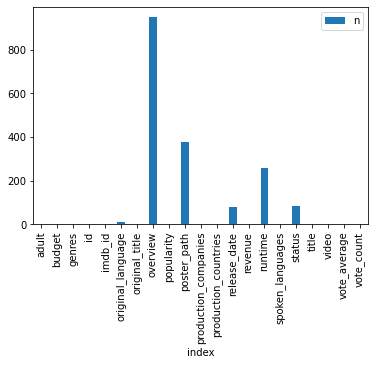

In [33]:
movies_metadata.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=90)


In [34]:
column_name_num = list(movies_metadata.select_dtypes(include=[np.number]))
column_name_num

['budget',
 'id',
 'popularity',
 'revenue',
 'runtime',
 'vote_average',
 'vote_count']

In [35]:
#fill the missing values in popularity, vote_average, runtime, revenue, vote_count with the mean value
popularity_mean = movies_metadata.popularity.mean()
vote_average_mean = movies_metadata.vote_average.mean()
runtime_mean = movies_metadata.runtime.mean()
revenue_mean = movies_metadata.revenue.mean()
vote_count_mean = movies_metadata.vote_count.mean()

movies_metadata.popularity.fillna(value=popularity_mean, inplace=True)
movies_metadata.vote_average.fillna(value=vote_average_mean, inplace=True)
movies_metadata.runtime.fillna(value=runtime_mean, inplace=True)
movies_metadata.revenue.fillna(value=revenue_mean, inplace=True)
movies_metadata.vote_count.fillna(value=vote_count_mean, inplace=True)

In [36]:
movies_metadata.isna().sum() 

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language        11
original_title            0
overview                950
popularity                0
poster_path             378
production_companies      3
production_countries      3
release_date             81
revenue                   0
runtime                   0
spoken_languages          3
status                   83
title                     3
video                     3
vote_average              0
vote_count                0
dtype: int64

In [37]:
#indexes of rows with missing values in column overview
# movies_metadata[movies_metadata['overview'].isnull()].index.tolist()

In [38]:
#remove rows with nul values in column title, video, production_countries, production_companies, spoken_languages -> theay are the same row
print(movies_metadata[movies_metadata['title'].isnull()].index.tolist())
print(movies_metadata[movies_metadata['video'].isnull()].index.tolist())
print(movies_metadata[movies_metadata['production_countries'].isnull()].index.tolist())
print(movies_metadata[movies_metadata['production_companies'].isnull()].index.tolist())
print(movies_metadata[movies_metadata['spoken_languages'].isnull()].index.tolist())

movies_metadata = movies_metadata.drop([19676, 29435, 35512])
movies_metadata

[19676, 29435, 35512]
[19676, 29435, 35512]
[19676, 29435, 35512]
[19676, 29435, 35512]
[19676, 29435, 35512]


,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,False,7.7,5415.0
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",2,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,False,6.9,2413.0
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",3,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Grumpier Old Men,False,6.5,92.0
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Waiting to Exhale,False,6.1,34.0
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",5,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",176269,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,...,"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Subdue,False,4.0,1.0
45379,False,0,"[{'id': 18, 'name': 'Drama'}]",176271,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,...,"[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,Century of Birthing,False,9.0,3.0
45380,False,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",176273,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Betrayal,False,3.8,6.0
45381,False,0,[],176275,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,...,"[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,Satan Triumphant,False,0.0,0.0


In [39]:
movies_metadata.isna().sum() 

adult                     0
budget                    0
genres                    0
id                        0
imdb_id                   0
original_language        11
original_title            0
overview                950
popularity                0
poster_path             375
production_companies      0
production_countries      0
release_date             78
revenue                   0
runtime                   0
spoken_languages          0
status                   80
title                     0
video                     0
vote_average              0
vote_count                0
dtype: int64

In [40]:
#find the percentage of missing values in all columns
movies_metadata.isnull().mean() * 100

# as all the other columns' missing data are less than 5% we can ignore them

adult                   0.000000
budget                  0.000000
genres                  0.000000
id                      0.000000
imdb_id                 0.000000
original_language       0.024240
original_title          0.000000
overview                2.093433
popularity              0.000000
poster_path             0.826355
production_companies    0.000000
production_countries    0.000000
release_date            0.171882
revenue                 0.000000
runtime                 0.000000
spoken_languages        0.000000
status                  0.176289
title                   0.000000
video                   0.000000
vote_average            0.000000
vote_count              0.000000
dtype: float64

In [41]:
movies_metadata.genres[0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [42]:
# from sklearn.preprocessing import MultiLabelBinarizer

# mlb = MultiLabelBinarizer()
# y = pd.DataFrame(mlb.fit_transform(movies_metadata.genres), columns=mlb.classes_)

# movies_metadata = movies_metadata.join(y)
# movies_metadata.head()
# df.drop('label', inplace=True, axis=1)
# df.to_csv('doc-tc/encoded_data.csv', index=False)

In [43]:
#Multiple labels columns: spoken_languages, genres, production_countries,
movies_metadata.info

<bound method DataFrame.info of        adult    budget                                             genres  \
0      False  30000000  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      False  65000000  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      False         0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      False  16000000  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4      False         0                     [{'id': 35, 'name': 'Comedy'}]   
...      ...       ...                                                ...   
45378  False         0  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45379  False         0                      [{'id': 18, 'name': 'Drama'}]   
45380  False         0  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45381  False         0                                                 []   
45382  False         0                                                 []   

           id    imdb_id original_language 